# **IEOR E4650  Business Analytics (Fall 2019)**

##**Lecture 4: Building a linear regression model**

In this lecture, we discuss different ways of variable transformation to help improve the prediction power of our model.

Learning objective:

* Understand different ways to transform the variables.
* Understand how to apply different techniques in the real-world settings.  
* Understand how to use Python to estimate a model that includes transformed variables. 





In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/open?id=17Sa-DuRFCWfPzCW6uRbPwxAyo1mQARUn"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('myfile.csv')  
import pandas as pd
Sales = pd.read_csv('myfile.csv')



In [0]:
from statsmodels.formula.api import ols
import numpy as np
from sklearn.utils import shuffle
Sales= shuffle(Sales)
Sales.replace("-",np.nan,inplace=True)
Sales=Sales.astype({"GROSS_SQUARE_FEET":"float64","YEAR_BUILT":"float64","LAND_SQUARE_FEET":"float64"}) 


In [0]:
Sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'SALE_PRICE'],
      dtype='object')

In [0]:
Sales=Sales.rename(columns={"LAND_SQUARE_FEET":"LSF","GROSS_SQUARE_FEET":"GSF", \
                   "YEAR_BUILT":"YB","TOTAL_UNITS":"TU",  \
                   "COMMERCIAL_UNITS":"CU", "RESIDENTIAL_UNITS":"RU", \
                   "SALE_PRICE":"SP"})

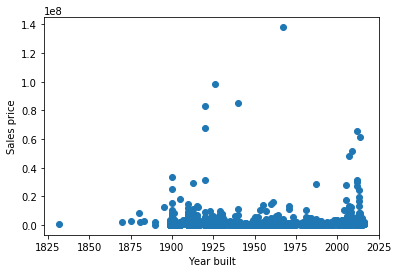

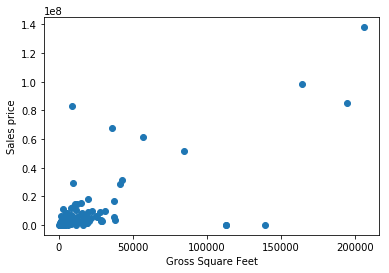

In [0]:
import matplotlib.pyplot as plt
plt.scatter(Sales["YB"].values,Sales["SP"].values )
plt.xlabel("Year built")
plt.ylabel("Sales price")
plt.show()

plt.scatter(Sales["GSF"].values,Sales["SP"].values )
plt.xlabel("Gross Square Feet")
plt.ylabel("Sales price")
plt.show()

##  Linear regression model for prediction

Besides a prediction model like the following:

$y=\beta_0+\beta_1 x_1+ \beta_2 x_2 +\beta_3 x_3 +\epsilon$

Are there different ways to build a richer model?

Yes, here are 4 most popular methods:

* polynomial 
* log transformation
* interaction term
* converting a categorical variable into dummy variables.

###Including Polynomial Terms

If we suspect that the impact of a variable on the dependent variable is not linear, we can add polynomial terms.

For example, we might want to use the amount of time a sales agent spent talking to clients to predict the performance. We might not expect the effect of time on the sales to be linear, but expect the marginal return of the time on the sales to be deminishing. In this case, we can construct a model as follows:

$Sales=\beta_0+\beta_1*time+\beta_2*time^2+\epsilon$


`ols(formula="y~x1+I(x1**2)+I(x1**3)",data=S1)`

In [0]:
model=ols(formula="SP~GSF",data=Sales).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     SP   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1924.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          5.66e-269
Time:                        14:42:48   Log-Likelihood:                -24400.
No. Observations:                1465   AIC:                         4.880e+04
Df Residuals:                    1463   BIC:                         4.881e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.163e+04   1.13e+05     -0.191      0.8

In [0]:
model=ols(formula="SP~GSF+I(GSF**2)",data=Sales).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     SP   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1019.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          7.58e-278
Time:                        14:42:20   Log-Likelihood:                -24375.
No. Observations:                1465   AIC:                         4.876e+04
Df Residuals:                    1462   BIC:                         4.877e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.228e+05   1.28e+05      3.306      

In [0]:
Sales["GSF"].describe()

count      1465.000000
mean       3325.554266
std       10962.599062
min         408.000000
25%        1352.000000
50%        1800.000000
75%        2552.000000
max      206000.000000
Name: GSF, dtype: float64

###Including Logarithm Terms

Usually, if the distribution of a variable exhibits a right tail, it can be useful to take the log transformation. Otherwise, the extreme values (which we call outlier) might influece our prediction too much. 

For example, if we want to perform log-transformation on $x_2$, we can use
$$y=\beta_0+\beta_1 x_1+\beta_2 log(x_2)+\epsilon$$


In order to take log-transformation, we will need the range of the variable to be positive. If the range is non-negative, we can add a small value to that variable as a remedy, for example using $log(x+1)$.

To perform log-transformation in Python, we can simply use

`ols(formula="y~x1+np.log(x2)",data=S1)`



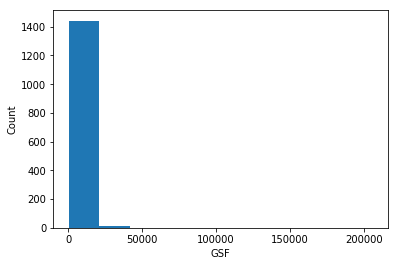

In [0]:
import matplotlib.pyplot as plt
plt.hist(Sales["GSF"].dropna().values)
plt.xlabel("GSF")
plt.ylabel("Count")
plt.show()


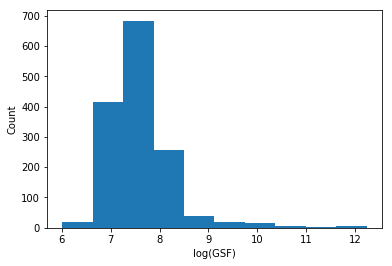

In [0]:
plt.hist(np.log(Sales["GSF"].dropna().values))
plt.xlabel("log(GSF)")
plt.ylabel("Count")
plt.show()


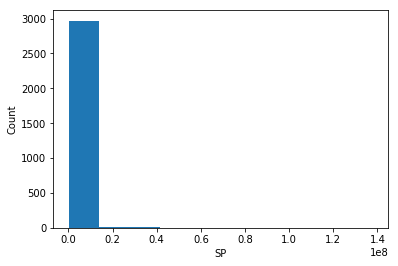

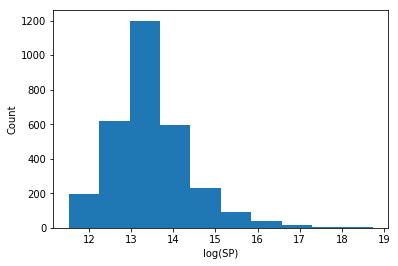

In [0]:
plt.hist(Sales["SP"].dropna().values)
plt.xlabel("SP")
plt.ylabel("Count")
plt.show()

plt.hist(np.log(Sales["SP"].dropna().values))
plt.xlabel("log(SP)")
plt.ylabel("Count")
plt.show()



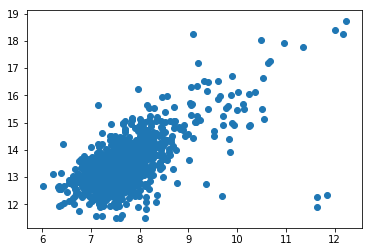

In [0]:
plt.scatter(np.log(Sales.dropna()["GSF"].values),np.log(Sales.dropna()["SP"].values))

One thing to notice is that if we performed log-transformation on the dependent variable. Once we finished our prediction, we can then exponentiate the predicted value. 

In [0]:
model=ols(formula="np.log(SP)~np.log(GSF)",data=Sales).fit()
print(model.summary())
np.exp(model.predict())

                            OLS Regression Results                            
Dep. Variable:             np.log(SP)   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1141.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          2.27e-185
Time:                        14:24:42   Log-Likelihood:                -1350.7
No. Observations:                1465   AIC:                             2705.
Df Residuals:                    1463   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.3363      0.182     40.388      

array([321699.97968916, 771651.72490001, 723759.97865159, ...,
       638409.42496947, 945932.47481336, 329621.17162634])

1. R2 should only be comparable if the dependent variables are the same
    in our case, one is in the original form, the other one is in logform
2. R2 can be misleading. might not be a good predictor of model prediction performanced.



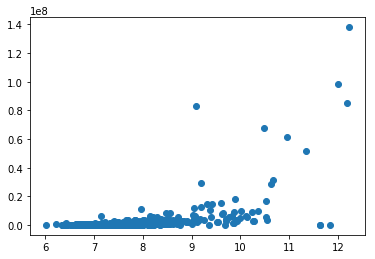

In [0]:
plt.scatter(np.log(Sales.dropna()["GSF"].values),Sales.dropna()["SP"].values)

###Including  Interaction Terms

When we expect that the impact of one variable on the depedent variable might be affected by the value of another variable, we can use the interaction term. For example, if we expect the influence of $x_1$ on $y$ varies based on the value of $x_2$, we might want to use 

$$y=\beta_0+\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$$


For example, we might want the following model to customer satisfaction level of our hotdog. We might use the number of condiments we provide and the number of sausage options we provide as the predictors. If you expect that consumers will care less about (or more) about the number of condiments we provide if we give them more sausage options, then we have a good reason to include the interaction term. 


To include an interaction term in Python, we can use x1:x2.

`ols(formula="y~x1+x2+x1:x2",data=S1)`

when we have `x1`, `x2` and `x1:x2` are all in the model, we can equivalently use x1*x2.

In [0]:
model=ols(formula="np.log(SP)~np.log(GSF)*TU",data=Sales).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(SP)   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     406.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          4.79e-192
Time:                        15:21:02   Log-Likelihood:                -1328.2
No. Observations:                1465   AIC:                             2664.
Df Residuals:                    1461   BIC:                             2686.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.0521      0.208     38.

In [0]:
Sales

,BOROUGH,NEIGHBORHOOD,RU,CU,TU,LSF,GSF,YB,SP
2427,5,CONCORD-FOX HILLS,1,0,1,1600.0,780.0,1995.0,347500.0
1858,3,FLATBUSH-NORTH,3,0,3,2000.0,2320.0,1935.0,510000.0
641,1,SOUTHBRIDGE,0,0,0,NaN,NaN,1971.0,1220000.0
17,1,FINANCIAL,0,0,0,NaN,NaN,NaN,26750000.0
1900,3,CANARSIE,2,0,2,1800.0,2142.0,1960.0,500000.0
2221,2,MOTT HAVEN/PORT MORRIS,2,0,2,2000.0,2280.0,1993.0,410036.0
751,3,MADISON,4,0,4,2483.0,3172.0,1932.0,1060000.0
1676,2,COUNTRY CLUB,2,0,2,2375.0,1937.0,1915.0,575000.0
1433,4,ST. ALBANS,2,0,2,2950.0,1620.0,1920.0,665000.0
1047,1,MURRAY HILL,0,0,0,NaN,NaN,1953.0,850000.0


###Converting Categorical Terms into Dummy Variables

A variable might be categorical, which mean the value of that variable indicates which category an observation belongs to. 

* If a categorical variable can only take 0/1, indicating whether an observation belongs to the category or not, we also call it dummy variable.

* If a categorical variable can take multiple values (say N categories), we can then need to tranform this variable into N-1 dummy variables and include them in the regression model. 

Suppose we have a categorical variable that can take three values, then we can run the following regression:

$$y=\beta_0+\beta_1 category_2 +\beta_2 category_3 +\epsilon$$

Notice that you can only include 2 (more generally N-1) categories, since the whether an observation belongs to the first category can be perfectly inferred from whether this observation belongs to the second and the third category or not.



In our example, "Borough" is can be considered a categorical variable. In this case, we can convert a categorical variable into several dummy variables. Each dummy variable indicates whether an observation belongs to a specific category.

Suppose x2 is a categorical variable, we can use `C(x2)` to convert this variable to a dummy variable.

`ols(formula="y~x1+C(x2)",data=S1)`

In [0]:
#WARNING: BAD MODEL
print(ols(formula="np.log(SP)~BOROUGH",data=Sales).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(SP)   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     608.3
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          1.89e-122
Time:                        14:32:34   Log-Likelihood:                -3766.1
No. Observations:                3000   AIC:                             7536.
Df Residuals:                    2998   BIC:                             7548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3146      0.037    382.625      0.0

In [0]:
#WARNING: good MODEL
print(ols(formula="np.log(SP)~C(BOROUGH)",data=Sales).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(SP)   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     219.3
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          2.76e-165
Time:                        14:49:55   Log-Likelihood:                -3657.9
No. Observations:                3000   AIC:                             7326.
Df Residuals:                    2995   BIC:                             7356.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.1562      0.030    4

* Interpretation:

$\beta_0$: The log of sales price for Borough 1 is expected to be 14.156.

$\beta_1$: Comparing to Borough 1, the log of sales price for Borough 2 is expected to be -1.1141 lower. 


#Activity

Based on the data we have (Feel free to use all 3000 observations or discard some), construct a model that gives the highest RMSE. 